In [3]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn as sk
import pandas as pd
df = pd.read_csv('RichmondPeakStageFlow_02037500.csv')
print(df)

   AGENCY  STATION ID      DATE  FLOW CMS   GAUGE M  ACTION STAGE  \
0    USGS     2037500    9/7/35   3594.10  6.403848        2.7432   
1    USGS     2037500   3/19/36   4952.50  7.138416        2.7432   
2    USGS     2037500   4/27/37   4301.60  6.903720        2.7432   
3    USGS     2037500  10/21/37   2617.75  5.547360        2.7432   
4    USGS     2037500   8/20/39   1638.57  4.379976        2.7432   
..    ...         ...       ...       ...       ...           ...   
81   USGS     2037500   2/25/16   1488.58  4.084320        2.7432   
82   USGS     2037500   5/27/17   1689.51  4.349496        2.7432   
83   USGS     2037500   2/12/18   2006.47  4.693920        2.7432   
84   USGS     2037500   2/25/19   2272.49  4.943856        2.7432   
85   USGS     2037500   4/14/20   1774.41  4.450080        2.7432   

    FLOOD STAGE  MODERATE STAGE  MAJOR STAGE     CLASS  
0        3.6576           4.572       6.7056  MODERATE  
1        3.6576           4.572       6.7056     MAJOR  


MODERATE    46
FLOOD       23
ACTION      12
MAJOR        5
Name: CLASS, dtype: int64


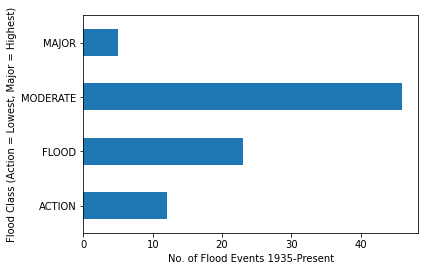

In [4]:
peak_flow = df['FLOW CMS']
peak_stage = df['GAUGE M']
#separate the events by flood type
action_stage = df['ACTION STAGE']
flood_stage = df['FLOOD STAGE']
moderate_flood = df['MODERATE STAGE']
major_flood = df['MAJOR STAGE']
date = df['DATE']
floodclass = df['CLASS']
floodclass.value_counts().loc[['ACTION', 'FLOOD', 'MODERATE','MAJOR']].plot.barh()
plt.style.use('classic')
plt.xlabel("No. of Flood Events 1935-Present")
plt.ylabel("Flood Class (Action = Lowest, Major = Highest)")
print(floodclass.value_counts())

Text(0.5, 1.0, 'Flood Events 1939 - Present')

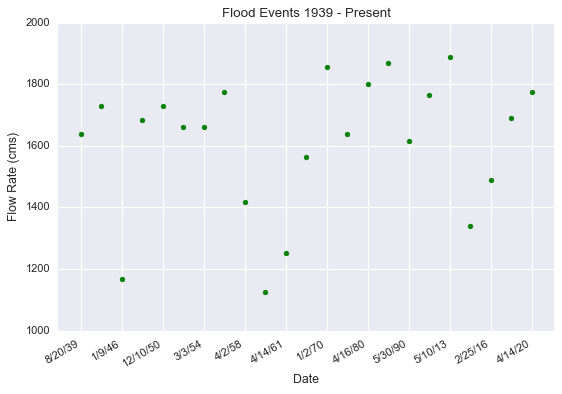

In [5]:
import matplotlib.dates as mdates
#Turn this into a scatter plot - only individual data points
floods=df[df['CLASS'] == 'FLOOD']
del floods["ACTION STAGE"]
del floods["FLOOD STAGE"]
del floods["MODERATE STAGE"]
del floods["MAJOR STAGE"]
plt.style.use('seaborn')
#PLOTTING THE GAUGE, AND THEN THE FLOW ONE BY ONE
gauge = floods['GAUGE M']
flow = floods['FLOW CMS']
dates = floods['DATE']
plt.scatter(dates,flow, color = 'green')
plt.gcf().autofmt_xdate()
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=2))
plt.gcf().autofmt_xdate()
plt.xlabel("Date")
plt.ylabel("Flow Rate (cms)")
plt.title('Flood Events 1939 - Present')
#print(floods)

Text(0.5, 1.0, 'Flood Events 1939 - Present')

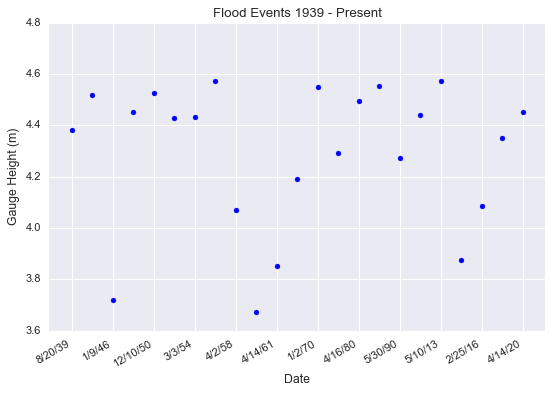

In [6]:
#Turn this into a scatter plot - only individual data points
floods=df[df['CLASS'] == 'FLOOD']
del floods["ACTION STAGE"]
del floods["FLOOD STAGE"]
del floods["MODERATE STAGE"]
del floods["MAJOR STAGE"]
plt.style.use('seaborn')
#PLOTTING THE GAUGE, AND THEN THE FLOW ONE BY ONE
gauge = floods['GAUGE M']
flow = floods['FLOW CMS']
dates = floods['DATE']
plt.scatter(dates,gauge, color = 'blue')
plt.gcf().autofmt_xdate()
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=2))
plt.gcf().autofmt_xdate()
plt.xlabel("Date")
plt.ylabel("Gauge Height (m)")
plt.title('Flood Events 1939 - Present')

Text(0.5, 1.0, 'Annual Peak Flow Events Richmond, VA 1939-2020')

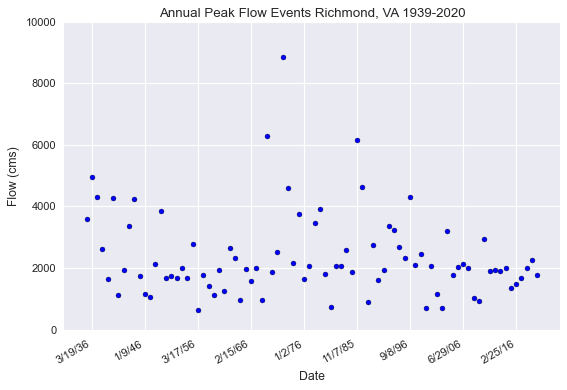

In [27]:
plt.style.use('seaborn')
#PLOTTING THE GAUGE, AND THEN THE FLOW ONE BY ONE
gauge = floods['GAUGE M']
flow = floods['FLOW CMS']
dates = floods['DATE']
plt.scatter(date,peak_flow)
plt.gcf().autofmt_xdate()
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))
plt.gcf().autofmt_xdate()
plt.xlabel("Date")
plt.ylabel("Flow (cms)")
plt.title('Annual Peak Flow Events Richmond, VA 1939-2020')

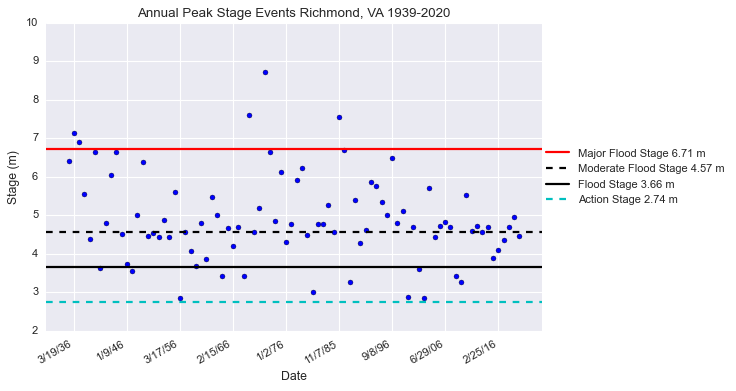

In [26]:
plt.style.use('seaborn')
#PLOTTING THE GAUGE, AND THEN THE FLOW ONE BY ONE
gauge = floods['GAUGE M']
flow = floods['FLOW CMS']
dates = floods['DATE']
plt.scatter(date,peak_stage)
plt.gcf().autofmt_xdate()
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))
plt.gcf().autofmt_xdate()
plt.xlabel("Date")
plt.ylabel("Stage (m)")
plt.title('Annual Peak Stage Events Richmond, VA 1939-2020')
plt.axhline(y=2.7432, color='c', linestyle='--',label='Action Stage 2.74 m',lw=2)
plt.axhline(y=3.6576, color='k', linestyle='-',label='Flood Stage 3.66 m',lw=2)
plt.axhline(y=4.572, color='k', linestyle='--',label='Moderate Flood Stage 4.57 m',lw=2)
plt.axhline(y=6.7056, color='r', linestyle='-',label='Major Flood Stage 6.71 m',lw=2)
handles, labels = plt.gca().get_legend_handles_labels()
order = [3,2,1,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],bbox_to_anchor=(1.0,0.5), loc="center left", borderaxespad=0)
#plt.legend(bbox_to_anchor=(1.0,0.5), loc="center left", borderaxespad=0)


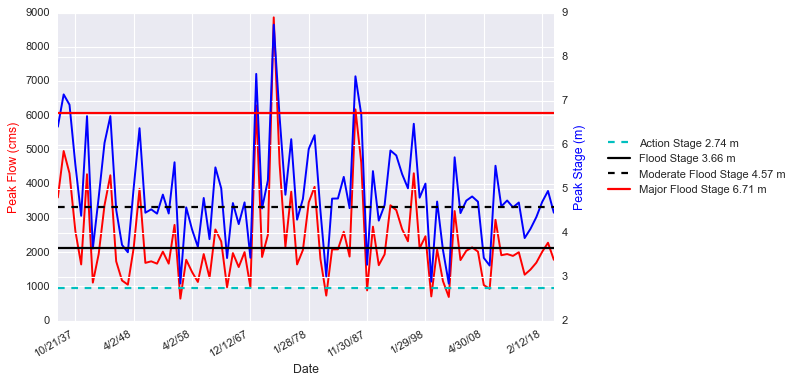

In [17]:
x = date
y1 = peak_flow
y2 = peak_stage
plt.style.use('seaborn')
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(x, y1,'r-')
ax2.plot(x, y2,'b-')

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))
plt.gcf().autofmt_xdate()
ax1.set_xlabel('Date')
ax1.set_ylabel('Peak Flow (cms)',color='r')
ax2.set_ylabel('Peak Stage (m)',color='b')
plt.axhline(y=2.7432, color='c', linestyle='--',label='Action Stage 2.74 m',lw=2)
plt.axhline(y=3.6576, color='k', linestyle='-',label='Flood Stage 3.66 m',lw=2)
plt.axhline(y=4.572, color='k', linestyle='--',label='Moderate Flood Stage 4.57 m',lw=2)
plt.axhline(y=6.7056, color='r', linestyle='-',label='Major Flood Stage 6.71 m',lw=2)
plt.legend(bbox_to_anchor=(1.1,0.5), loc="center left", borderaxespad=0)


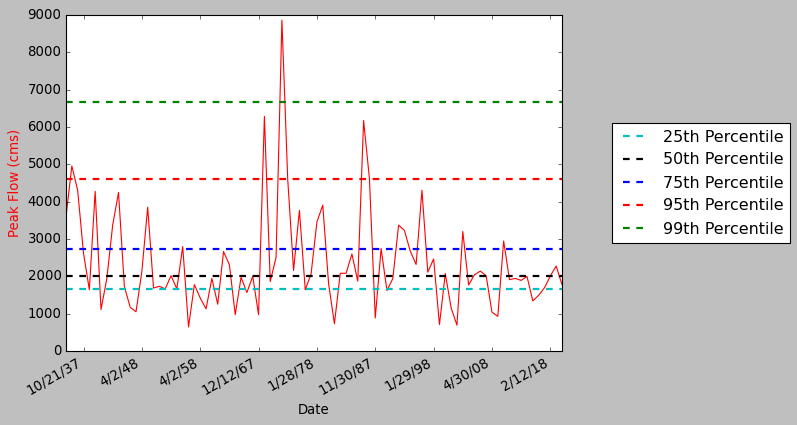

In [10]:
x = date
y1 = peak_flow
y2 = peak_stage
plt.style.use('classic')
fig, ax1 = plt.subplots()
#ax2 = ax1.twinx()
ax1.plot(x, y1,'r-')
#ax2.plot(x, y2,'b-')

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))
plt.gcf().autofmt_xdate()
ax1.set_xlabel('Date')
ax1.set_ylabel('Peak Flow (cms)',color='r')
#ax2.set_ylabel('Peak Stage (m)',color='b')
plt.axhline(y=np.percentile(peak_flow, 25), color='c', linestyle='--',label='25th Percentile',lw=2)
plt.axhline(y=np.percentile(peak_flow, 50), color='k', linestyle='--',label='50th Percentile',lw=2)
plt.axhline(y=np.percentile(peak_flow, 75), color='b', linestyle='--',label='75th Percentile',lw=2)
plt.axhline(y=np.percentile(peak_flow, 95), color='r', linestyle='--',label='95th Percentile',lw=2)
plt.axhline(y=np.percentile(peak_flow, 99), color='g', linestyle='--',label='99th Percentile',lw=2)
plt.legend(bbox_to_anchor=(1.1,0.5), loc="center left", borderaxespad=0)

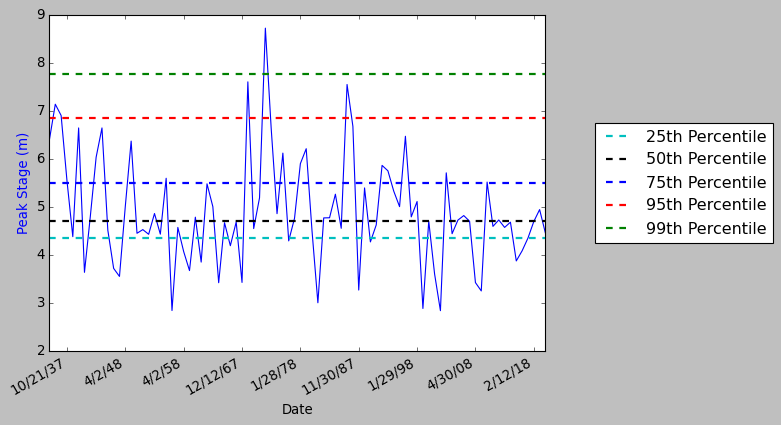

In [11]:
x = date
y1 = peak_flow
y2 = peak_stage
plt.style.use('classic')
fig, ax1 = plt.subplots()
#ax2 = ax1.twinx()
ax1.plot(x, y2,'b-')
#ax2.plot(x, y2,'b-')

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))
plt.gcf().autofmt_xdate()
ax1.set_xlabel('Date')
ax1.set_ylabel('Peak Stage (m)',color='b')
#ax2.set_ylabel('Peak Stage (m)',color='b')
plt.axhline(y=np.percentile(peak_stage, 25), color='c', linestyle='--',label='25th Percentile',lw=2)
plt.axhline(y=np.percentile(peak_stage, 50), color='k', linestyle='--',label='50th Percentile',lw=2)
plt.axhline(y=np.percentile(peak_stage, 75), color='b', linestyle='--',label='75th Percentile',lw=2)
plt.axhline(y=np.percentile(peak_stage, 95), color='r', linestyle='--',label='95th Percentile',lw=2)
plt.axhline(y=np.percentile(peak_stage, 99), color='g', linestyle='--',label='99th Percentile',lw=2)
plt.legend(bbox_to_anchor=(1.1,0.5), loc="center left", borderaxespad=0)